# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!

my_btc_price_data = requests.get(btc_url).json()


my_btc_price = my_btc_price_data["data"]["1"]["quotes"]["USD"]["price"]

print(my_btc_price)



# Fetch current ETH price
# YOUR CODE HERE!]

my_eth_price_data = requests.get(eth_url).json()

my_eth_price = my_eth_price_data["data"]["1027"]["quotes"]["USD"]["price"]

print(my_eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!


my_btc_value = my_btc_price * my_btc
my_eth_value = my_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


58739.0
1827.34
The current value of your 1.2 BTC is $70486.80
The current value of your 5.3 ETH is $9684.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [19]:
# Current amount of shares
# YOUR CODE HERE!

shares_data = {
    "shares": [200, 50]
}

# set the tickers

tickers = ["AGG", "SPY"]

# Create the shares DataFrame

df_shares = pd.DataFrame(shares_data, index=tickers)


# Display shares data 

df_shares

,shares
AGG,200
SPY,50


In [9]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify the Alpaca Api has been loaded successfully 

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [13]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-03-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-03-23 00:00:00-04:00  113.89  114.04  113.77  114.04  5026028  391.91   

                                                             
                             high     low   close    volume  
time                                                         
2021-03-23 00:00:00-04:00  393.46  388.66  389.59  78235945

In [15]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_price = float(df_portfolio["AGG"]["close"])
spy_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $114.04
Current SPY closing price: $389.59


In [20]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = agg_price * df_shares.loc["AGG"]["shares"]
my_spy_value = spy_price * df_shares.loc["SPY"]["shares"]


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19479.50
The current value of your 200 AGG shares is $22808.00


### Savings Health Analysis

In [36]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

total_crypto = (my_btc_value+my_eth_value)
total_shares = (my_agg_value+my_spy_value)

value_data = {
    "amount": [total_crypto, total_shares]
}

# set index values

values = ["crypto", "shares"]

# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame(value_data, index=values)


# Display savings DataFrame
display(df_savings)

,amount
crypto,80171.702
shares,42287.500


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='amount'>

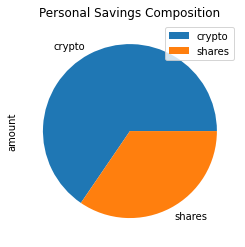

In [26]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

print(emergency_fund)

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = total_crypto + total_shares

print(total_savings)

# Validate saving health
# YOUR CODE HERE!

if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
    
if (total_savings == emergency_fund):
    print("Congratulations! Your savings are equal to your emergency fund.")

if (total_savings < emergency_fund):
    print("Unfortunately, you are still (emergency_fund-total_savings) little away from your goal.")

36000
122459.202
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [54]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

tickers = ["AGG", "SPY"]

#Set timeframe to '1D'

timeframe = "1D"

#Set start and end datetimes of 5 years from Today

start_date = pd.Timestamp("2016-03-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-24", tz="America/New_York").isoformat()

#Get 5 year's worth of historical price data 

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775.0     NaN   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935.0  235.00   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282.0  236.26   
2017-04-06 00:00:00-04:00  108.64  108.71  108.480  108.67  1599535.0  234.95   
2017-04-07 00:00:00-04:00  108.80  108.89  108.420  108.44  1668826.0  235.15   

                                                                
                             high      low   close      volume  
time                                                            
2017-04-03 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-04-04 00:00:00-04:00  235.58  234.555  235.51  43130784.0  
2017-04-05 00:00:00-04:00  237.39  234.540  234.77  84819899.0  
2017-04-06 00:00:00-04:00  236.04  234.425  235.39  53559902.0  
2017-04-07 00:00:00-04:00  236.00  234.640  235.17  53293901.0

In [63]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

num_sims = 500

MC_df_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [64]:
# Printing the simulation input data
# YOUR CODE HERE!

num_sims = 500

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_df_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000861,0.995820,1.009169,0.999204,0.997348,0.997927,0.995786,1.006681,1.005016,1.001926,...,1.000896,1.004428,0.992806,0.995603,0.994853,0.997420,0.999295,0.998542,0.983006,1.007101
2,0.989016,0.996249,0.999466,1.008881,0.997178,0.995560,1.004376,1.007180,1.012982,1.007455,...,1.004666,0.995389,0.991964,1.000786,1.001209,0.992659,1.000467,0.990562,0.989221,1.006940
3,0.987393,0.999653,1.003151,1.019000,1.008181,0.998986,1.010112,1.011263,1.007346,1.004963,...,1.006371,0.992481,0.992678,1.003181,1.010618,0.992326,0.999532,0.992919,0.989133,1.013272
4,0.984089,1.006469,1.003884,1.013701,1.003816,0.999341,1.001681,0.993386,1.011317,1.000720,...,0.994594,0.992312,0.999565,1.005373,1.018014,0.987867,0.991159,0.991008,0.989451,1.010066
5,0.983976,1.013341,1.000026,1.015766,1.004409,0.993441,0.993143,0.992458,1.012912,1.011219,...,0.990847,0.994380,1.003230,1.005915,1.029559,0.985179,1.002274,0.986987,0.986633,1.015630
6,0.979749,1.018083,0.992566,1.015915,1.008953,0.990585,0.990622,0.996283,1.011772,1.013013,...,0.980968,0.996524,1.006521,1.007191,1.025727,0.972035,1.001240,0.991856,0.989273,1.016709
7,0.976214,1.027527,0.995763,1.017551,1.010280,1.006777,0.993125,0.990391,1.021233,1.014747,...,0.989155,0.990017,1.005349,1.008634,1.029187,0.980038,1.000510,0.984436,0.999064,1.012689
8,0.981595,1.026820,1.000660,1.012282,1.002591,1.001984,0.998788,0.981945,1.021661,1.015076,...,0.986235,0.996880,0.996521,1.010816,1.028303,0.988758,1.003149,0.982151,1.002414,1.015663
9,0.984815,1.022537,1.005745,1.009801,1.003618,0.999873,1.004059,0.985820,1.026905,1.024719,...,0.984681,1.000442,1.002543,1.006604,1.033865,0.993685,1.000809,0.978614,1.005917,1.020852


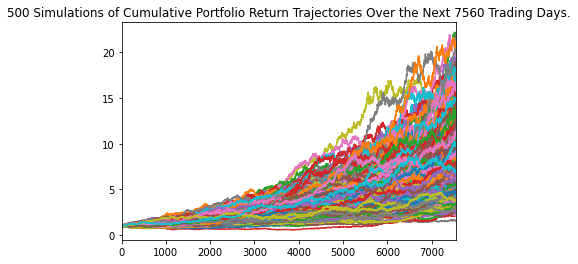

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!

shares_line_plot = MC_df_stock_data.plot_simulation()



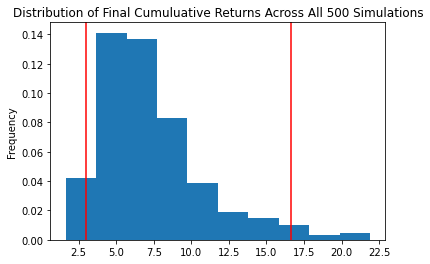

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_df_stock_data.plot_distribution()

### Retirement Analysis

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

stats_tbl = MC_df_stock_data.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(stats_tbl)

count           500.000000
mean              7.317570
std               3.498721
min               1.633246
25%               4.762325
50%               6.556702
75%               8.811089
max              21.895313
95% CI Lower      3.015152
95% CI Upper     16.604881
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [71]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

stock_ci_lower = round(stats_tbl*20000,2)
stock_ci_upper = round(stats_tbl*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $count           10000000.00
mean              146351.40
std                69974.43
min                32664.92
25%                95246.49
50%               131134.03
75%               176221.79
max               437906.26
95% CI Lower       60303.05
95% CI Upper      332097.62
Name: 7560, dtype: float64 and $count           10000000.00
mean              146351.40
std                69974.43
min                32664.92
25%                95246.49
50%               131134.03
75%               176221.79
max               437906.26
95% CI Lower       60303.05
95% CI Upper      332097.62
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [72]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

stock_ci_lower = round(stats_tbl*30000,2)
stock_ci_upper = round(stats_tbl*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${stock_ci_lower} and ${stock_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $count           15000000.00
mean              219527.10
std               104961.64
min                48997.37
25%               142869.74
50%               196701.05
75%               264332.68
max               656859.40
95% CI Lower       90454.57
95% CI Upper      498146.43
Name: 7560, dtype: float64 and $count           15000000.00
mean              219527.10
std               104961.64
min                48997.37
25%               142869.74
50%               196701.05
75%               264332.68
max               656859.40
95% CI Lower       90454.57
95% CI Upper      498146.43
Name: 7560, dtype: float64


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")